In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import neighbors
from sklearn import metrics
from matplotlib import pyplot as plt

In [2]:
categories = ['comp.graphics', 'sci.med']
train = fetch_20newsgroups(subset='train',
                           categories=categories,
                           shuffle=True,
                           random_state=42,
                           )
target_name = train.target_names
print('Using dataset:', target_name)

Using dataset: ['comp.graphics', 'sci.med']


In [3]:
# 初始化词频向量化器
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(train.data)
# 这是一个稀疏矩阵
print(X_train_counts.shape)
print(X_train_counts.toarray())

(1178, 24614)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
# 初始化tf-idf向量化器
tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_counts)
print(X_train_tf.shape)

(1178, 24614)


In [5]:
# 初始化测试数据集向量
test = fetch_20newsgroups(subset='test',
                          categories=categories,
                          shuffle=True,
                          random_state=42,
                          )
X_test_count = count_vectorizer.transform(test.data)
X_test_tf = tf_transformer.transform(X_test_count)

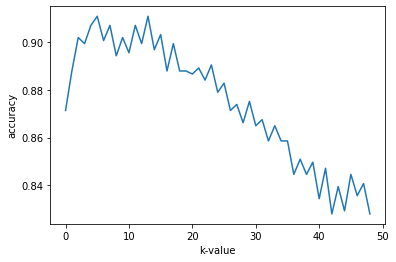

best k-value is: 6


In [6]:
# 找出表现最好的k值
all_results = []
for k in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,p=2)
    knn = knn.fit(X_train_tf,train.target)
    acc = knn.score(X_test_tf, test.target)
    all_results.append(acc)
plt.plot(all_results)
plt.xlabel('k-value')
plt.ylabel('accuracy')
plt.show()
best_k = all_results.index(max(all_results))+1
print('best k-value is:',best_k)

In [7]:
# 训练knn模型，使用欧几里得距离
knn = neighbors.KNeighborsClassifier(n_neighbors=best_k,p=2)
clf = knn.fit(X_train_tf, train.target)

In [8]:
# 先对简单的几段文字进行测试，检测其分类效果
docs_new = ['science is good',
            'I need a new CPU and CPU',
            'this is a third sentence']
X_new_counts = count_vectorizer.transform(docs_new)
X_new_tf = tf_transformer.transform(X_new_counts)

In [9]:
# 分类器对于小测试用例的来源预测如下：
predicted = clf.predict(X_new_tf)
for x in predicted:
    print(categories[x])

sci.med
comp.graphics
comp.graphics


In [10]:
predicted = clf.predict(X_test_tf)

# 测试准确度
print("Acc:", metrics.accuracy_score(test.target, predicted))
print(metrics.classification_report(test.target, predicted, target_names=test.target_names))
print("Confusion matrix:")
metrics.confusion_matrix(test.target, predicted)

Acc: 0.910828025477707
               precision    recall  f1-score   support

comp.graphics       0.91      0.91      0.91       389
      sci.med       0.91      0.91      0.91       396

     accuracy                           0.91       785
    macro avg       0.91      0.91      0.91       785
 weighted avg       0.91      0.91      0.91       785

Confusion matrix:


array([[354,  35],
       [ 35, 361]], dtype=int64)